In [1]:
import os
import warnings

# numpy library
import numpy as np

# pandas library
import pandas as pd

# ignore warning
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '99'

# Dataset load
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data_frame = pd.read_csv("housing.csv", delimiter=r"\s+", header=None, names=column_names)
pd.set_option('display.max_columns', 14)
# show data rows and columns
print("No of rows and columns: ", data_frame.shape)

No of rows and columns:  (506, 14)


In [2]:
# Display the first 5 rows of the dataset
print(data_frame.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [4]:
# Display summarize data of the distribution data
print(data_frame.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

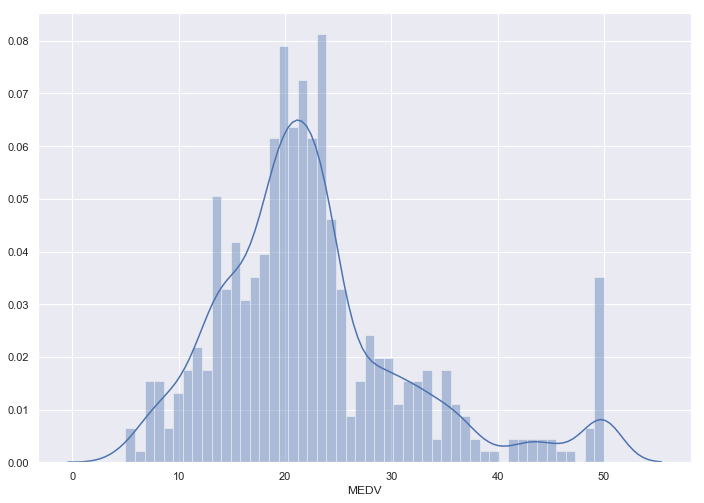

In [6]:
# seaborn library
import seaborn as sns

# matplotlib library
import matplotlib.pyplot as plt

# Data pre-visualization by set the size of the figure
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Plot a histogram showing the distribution of the target values
sns.distplot(data_frame['MEDV'], bins=50)

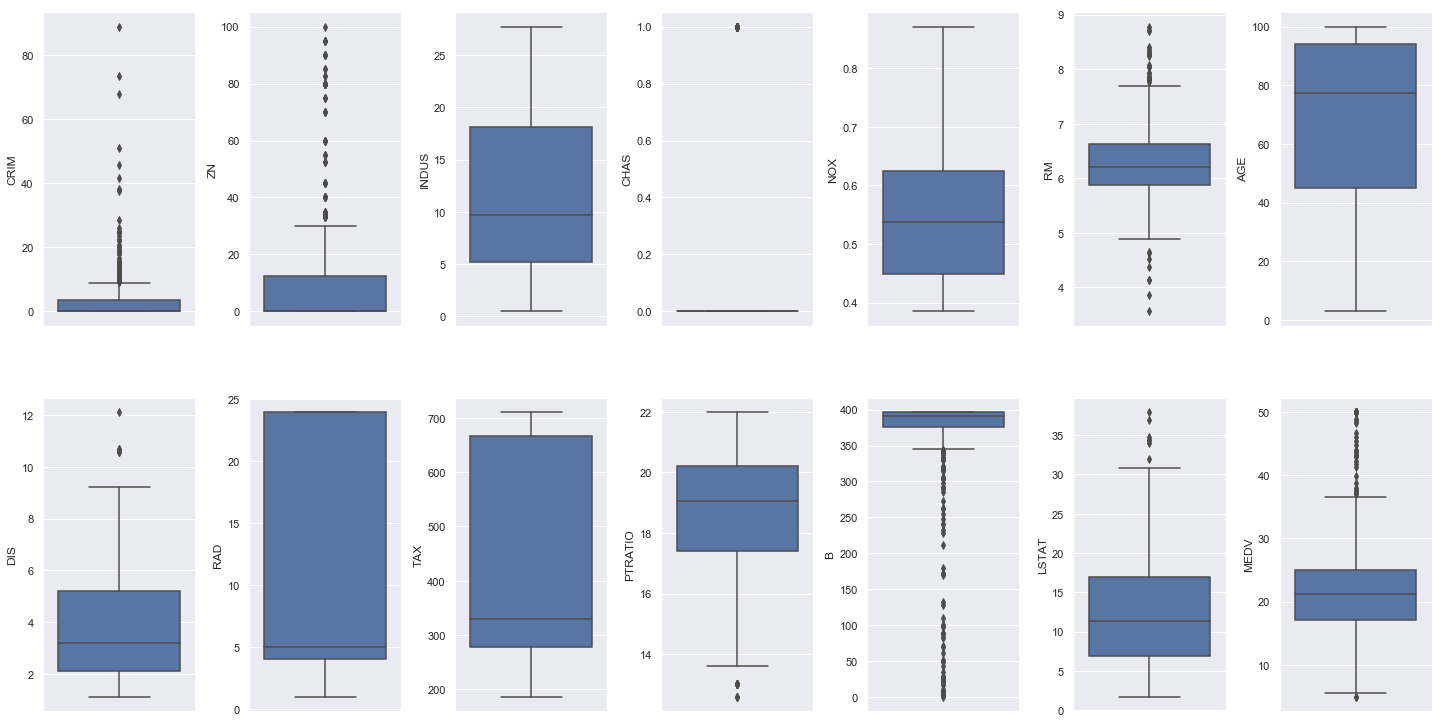

In [7]:
# Data visualization as box plot for each feature and target value
figure, axis = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axis = axis.flatten()
for k, v in data_frame.items():
    sns.boxplot(y=k, data=data_frame, ax=axis[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Skewness: 1.108098
Kurtosis: 1.495197


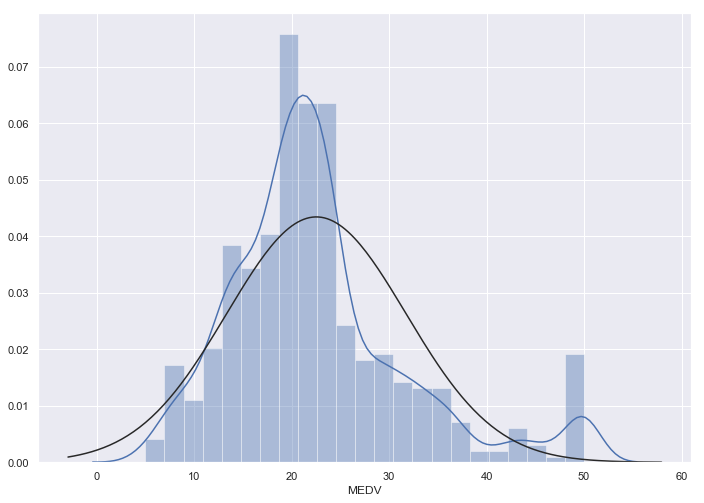

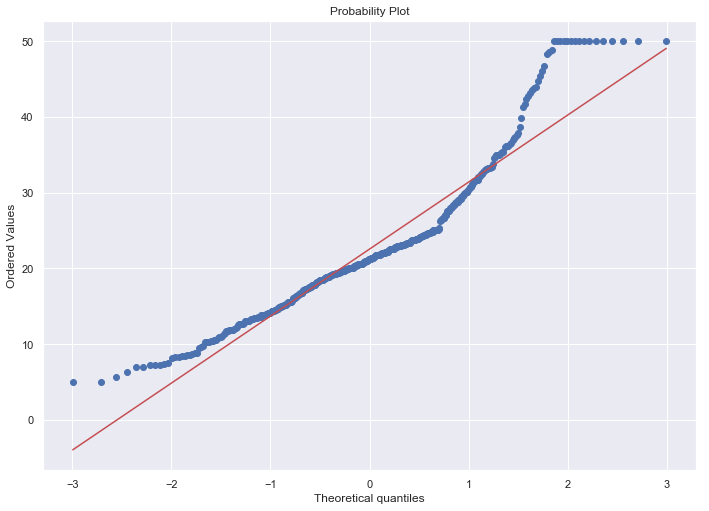

In [8]:
# scipy library
from scipy import stats
from scipy.stats import norm

# target overview and analysis
# Check the target variable's distribution
target = data_frame['MEDV']
sns.distplot(target, fit=norm)
fig = plt.figure()
res = stats.probplot(target, plot=plt)

# display skewness and kurtosis
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

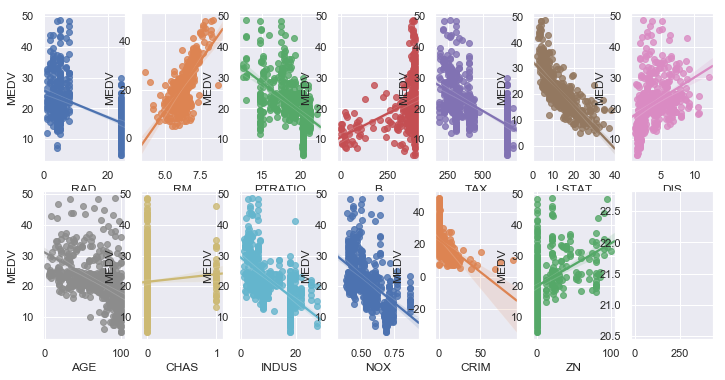

In [9]:
# Run a bi-variate analysis of data without the 50s
feature_cols = set(data_frame.columns) - {'MEDV'}
dataF = data_frame[data_frame['MEDV'] != 50]
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 6))
for i, feature in enumerate(feature_cols):
    sns.regplot(x=feature, y='MEDV', data=dataF, ax=axs[int(i / 7), i % 7])

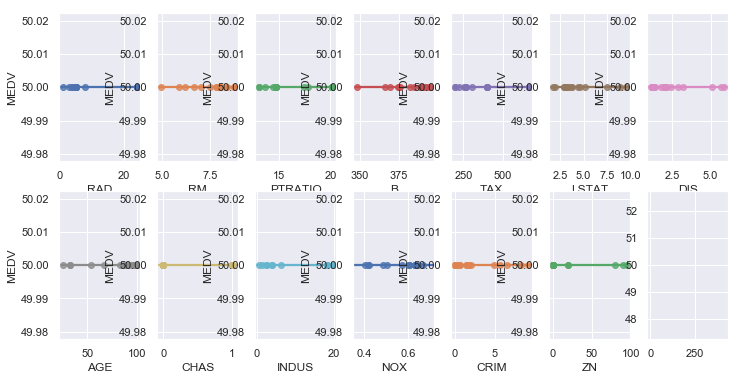

In [10]:
# Run a bi-variate analysis of data with the 50s
dataF = data_frame[data_frame['MEDV'] == 50]
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(12, 6))
for i, feature in enumerate(feature_cols):
    sns.regplot(x=feature, y='MEDV', data=dataF, ax=axs[int(i / 7), i % 7])

In [11]:
# Check the data point and plot histogram
dataF_F = data_frame[data_frame['MEDV'] != 50]
print(len(dataF_F))

490


Skewness: 0.775660
Kurtosis: 1.049637


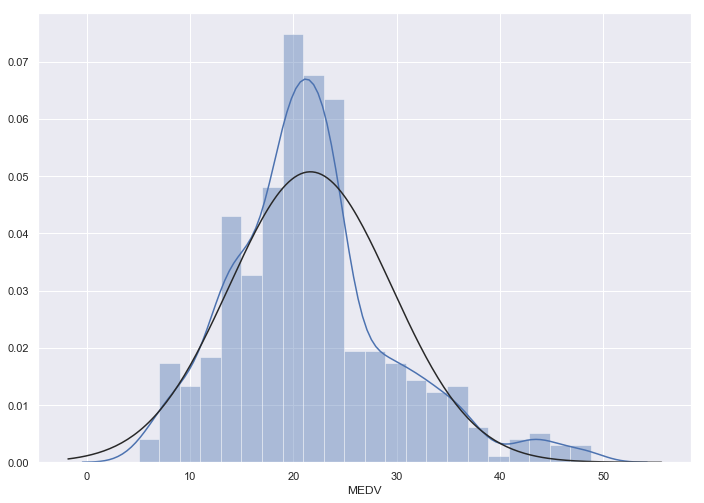

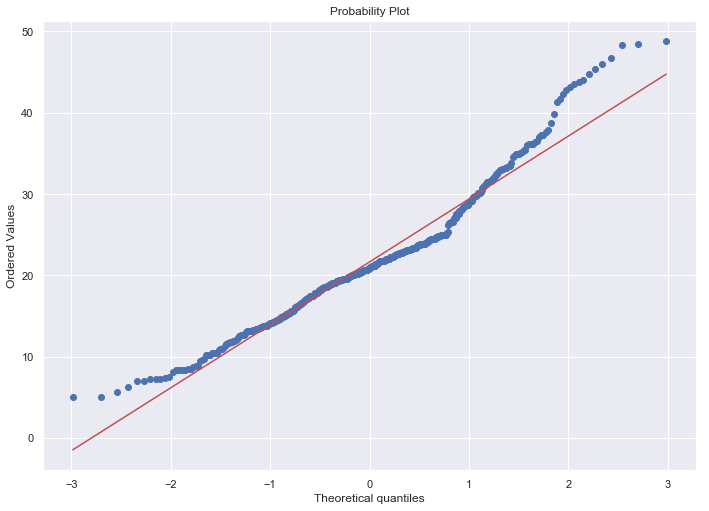

In [12]:
target = dataF_F['MEDV']
sns.distplot(target, fit=norm)
fig = plt.figure()
res = stats.probplot(target, plot=plt)

# display skewness and kurtosis
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

In [13]:
# Feature overview and analysis
# Check all feature to see if there is any missing value
data_frame.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


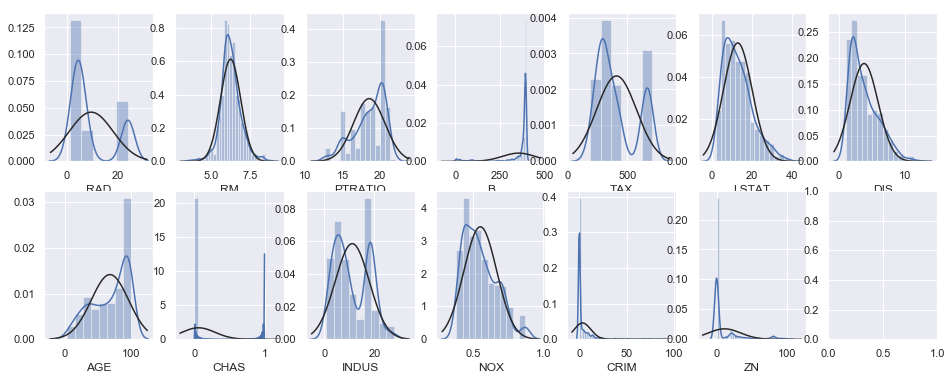

In [14]:
# Univariate analysis
dataF = data_frame[data_frame['MEDV'] != 50]

feature_cols = set(data_frame.columns) - {'MEDV'}
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(16, 6))
for i, f in enumerate(feature_cols):
    sns.distplot(dataF[f], fit=norm, ax=axs[int(i / 7), i % 7])

/Users/jackfeng/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


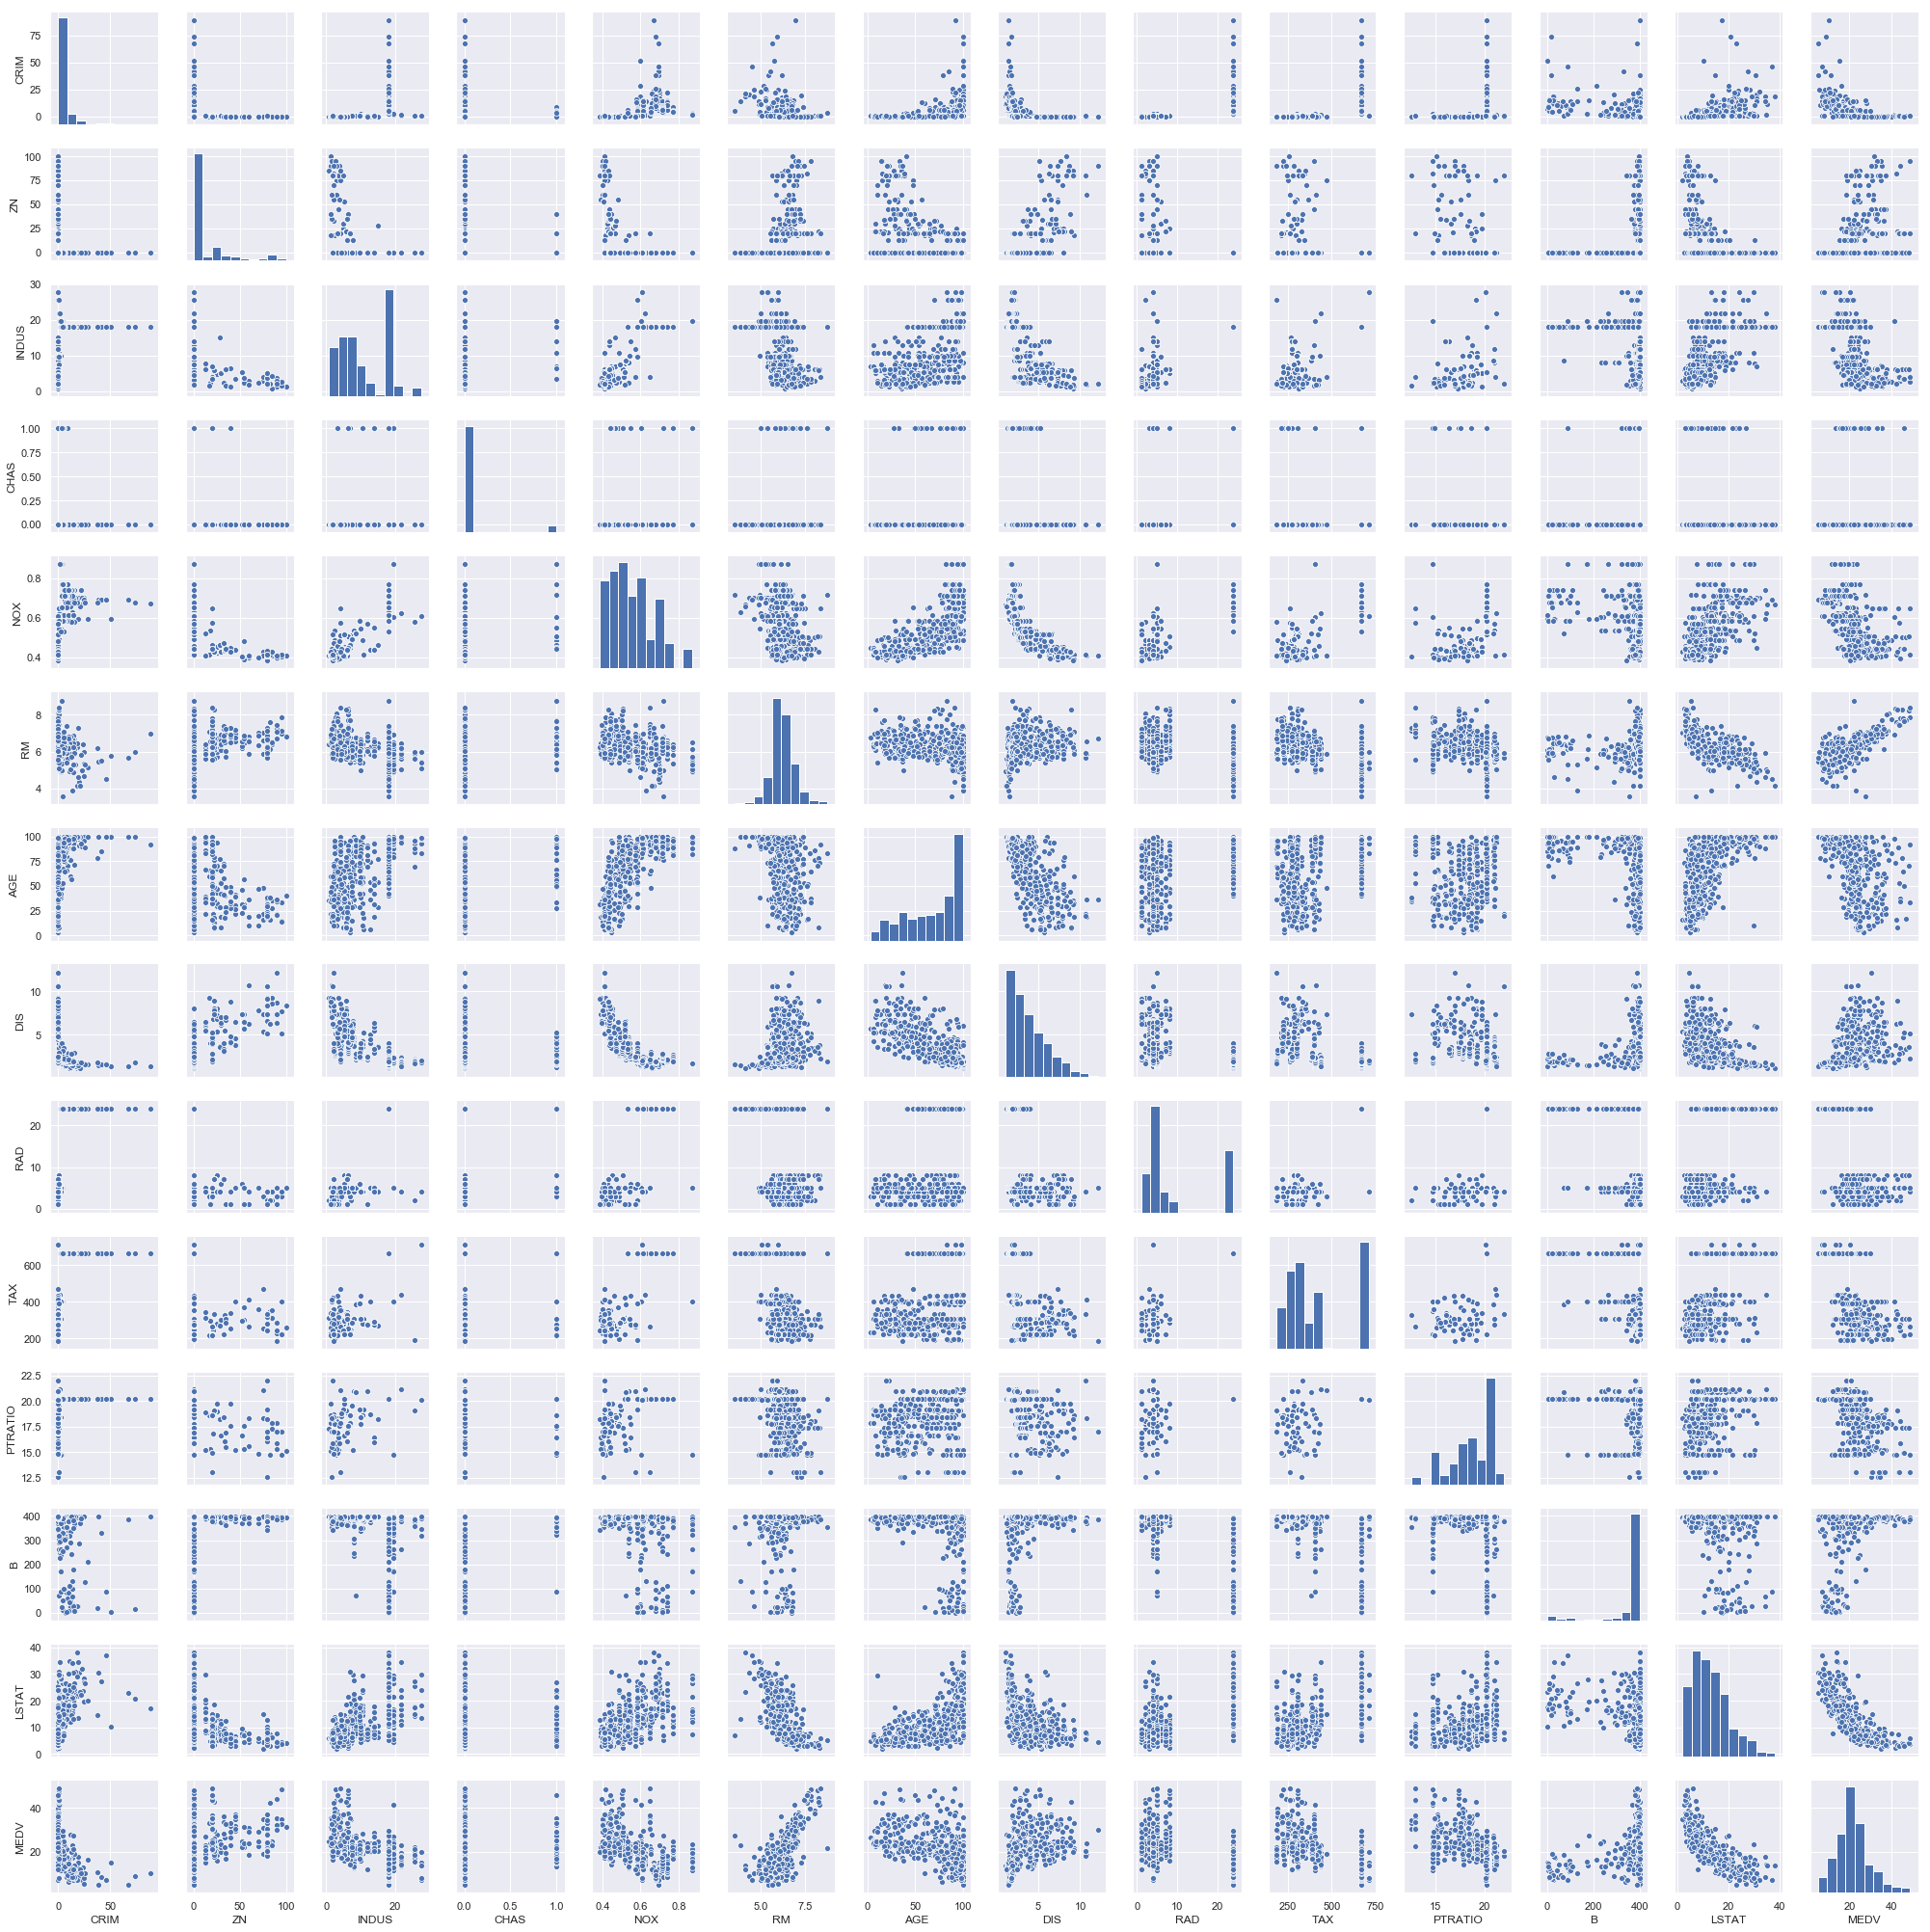

In [30]:
# Bivariate analysis
dataF = data_frame[data_frame['MEDV'] != 50]

sns.set()
sns.pairplot(dataF, size=2)

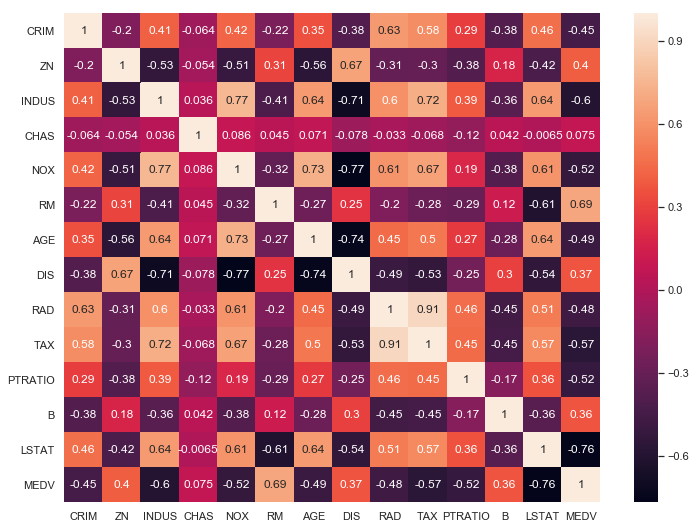

In [17]:
# correlation matrix
correlation_matrix = dataF.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True)

In [25]:
from sklearn.model_selection import train_test_split

# Data Pre-processing
dataF = data_frame[data_frame['MEDV'] != 50]

# Not include MEDV as it is target variable, and CHAS has the low correlation with MEDV
feature_cols = list(set(dataF.columns) - {'MEDV', 'CHAS'})
X_train, X_test, Y_train, Y_test = train_test_split(dataF[feature_cols], dataF['MEDV'], test_size=0.2, random_state=5)
print('No. of training data:', len(X_train))
print('No. of test data:', len(X_test))

No. of training data: 392
No. of test data: 98


In [26]:
from sklearn.preprocessing import MinMaxScaler
from IPython.core.display import display

# Normalise and scale all features so that all feature values fall between 0 and 1
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled = scaler.transform(X_train)

for i, col in enumerate(feature_cols):
    X_train[col] = scaled[:, i]
scaled_test = scaler.transform(X_test)
print('Before scaling:')
display(X_test.head())

for i, col in enumerate(feature_cols):
    X_test[col] = scaled_test[:, i]
print('\nAfter scaling:')
display(X_test.head())

/Users/jackfeng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Before scaling:


,RAD,RM,PTRATIO,B,TAX,LSTAT,DIS,AGE,INDUS,NOX,CRIM,ZN
245,7,5.605,19.1,389.13,330.0,18.46,7.9549,70.2,5.86,0.431,0.19133,22.0
456,24,5.976,20.2,10.48,666.0,19.01,2.5806,87.9,18.10,0.713,4.66883,0.0
75,5,6.286,18.7,383.23,398.0,8.94,4.5026,45.0,12.83,0.437,0.09512,0.0
238,6,6.481,16.6,379.41,300.0,6.36,6.1899,18.5,4.93,0.428,0.08244,30.0
362,24,5.362,20.2,380.79,666.0,10.19,2.1036,96.2,18.10,0.770,3.67822,0.0



After scaling:


,RAD,RM,PTRATIO,B,TAX,LSTAT,DIS,AGE,INDUS,NOX,CRIM,ZN
245,0.260870,0.391646,0.691489,0.980407,0.272901,0.450423,0.620401,0.693100,0.174962,0.094650,0.002079,0.22
456,1.000000,0.462732,0.808511,0.025619,0.914122,0.465915,0.131362,0.875386,0.636501,0.674897,0.052405,0.00
75,0.173913,0.522131,0.648936,0.965530,0.402672,0.182254,0.306256,0.433574,0.437783,0.106996,0.000998,0.00
238,0.217391,0.559494,0.425532,0.955898,0.215649,0.109577,0.459793,0.160659,0.139894,0.088477,0.000856,0.30
362,1.000000,0.345085,0.808511,0.959378,0.914122,0.217465,0.087957,0.960865,0.636501,0.792181,0.041271,0.00


In [27]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, \
    ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate

# Compare with all these models and choose the best one
estimator_list = [
    LinearRegression(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    MLPRegressor(solver='lbfgs'),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    LinearSVR(),
    NuSVR(),
    SVR()
]

cv_split = ShuffleSplit(n_splits=6, train_size=0.7, test_size=0.2, random_state=168)
df_columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Test Accuracy Std', 'Comsumed Time']
df = pd.DataFrame(columns=df_columns)

row_index = 0
for estimator in estimator_list:
    df.loc[row_index, 'Name'] = estimator.__class__.__name__
    df.loc[row_index, 'Parameters'] = str(estimator.get_params())
    cv_results = cross_validate(estimator, X_train, Y_train, cv=cv_split)
    df.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_score'].mean()
    df.loc[row_index, 'Test Accuracy Mean'] = cv_results['test_score'].mean()
    df.loc[row_index, 'Test Accuracy Std'] = cv_results['test_score'].std()
    df.loc[row_index, 'Comsumed Time'] = cv_results['fit_time'].mean()
    print(row_index, estimator.__class__.__name__)
    print(cv_results['test_score'])
    row_index += 1
df = df.sort_values(by='Test Accuracy Mean', ascending=False)
df

0 LinearRegression
[0.71736916 0.76678128 0.82219253 0.7799644  0.782039   0.72511946]
1 DecisionTreeRegressor
[0.64384794 0.41847878 0.73811933 0.69852951 0.72005542 0.64903747]
2 GradientBoostingRegressor
[0.86366686 0.73836155 0.90596511 0.84264851 0.89365637 0.80945005]
3 MLPRegressor
[0.8459689  0.75071761 0.91734329 0.85323924 0.88244508 0.71266253]
4 AdaBoostRegressor
[0.80128654 0.77691418 0.8769607  0.82325809 0.8417087  0.7691779 ]
5 BaggingRegressor
[0.82176476 0.6814223  0.90007653 0.79539508 0.87066178 0.73530155]
6 ExtraTreesRegressor
[0.83570396 0.80298992 0.91418058 0.832953   0.90252839 0.83154006]
7 RandomForestRegressor
[0.79831518 0.65235221 0.88461476 0.82167165 0.8554689  0.74256406]
8 LinearSVR
[0.62130689 0.62794457 0.62193742 0.71155666 0.59925028 0.58747037]
9 NuSVR
[0.48949659 0.4296012  0.4088985  0.50456676 0.40887047 0.47566448]
10 SVR
[0.4830694  0.3834622  0.42567899 0.52423819 0.4028438  0.46293488]


,Name,Parameters,Train Accuracy Mean,Test Accuracy Mean,Test Accuracy Std,Comsumed Time
6,ExtraTreesRegressor,"{'bootstrap': False, 'criterion': 'mse', 'max_...",1,0.853316,0.0405341,0.0120194
2,GradientBoostingRegressor,"{'alpha': 0.9, 'criterion': 'friedman_mse', 'i...",0.978609,0.842291,0.0563171,0.0343126
3,MLPRegressor,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",0.92457,0.827063,0.0720838,0.133378
4,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",0.904902,0.814884,0.0373248,0.0531168
5,BaggingRegressor,"{'base_estimator': None, 'bootstrap': True, 'b...",0.965259,0.80077,0.0749959,0.0183575
7,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.965891,0.792498,0.0768874,0.0177608
0,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.758391,0.765578,0.0356968,0.0102281
1,DecisionTreeRegressor,"{'criterion': 'mse', 'max_depth': None, 'max_f...",1,0.644678,0.106848,0.00361955
8,LinearSVR,"{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_...",0.637734,0.628244,0.0398583,0.00365261
9,NuSVR,"{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'd...",0.463333,0.45285,0.0386103,0.00500906


The model performance for training set
--------------------------------------
Root_Mean_Squared_Error is 1.3400690114334206
R2 score is 0.9701329754016731


The model performance for testing set
--------------------------------------
Root_Mean_Squared_Error is 2.6204850792155305
R2 score is 0.8991931576864471

Scatter plot of y_test against y_pred:


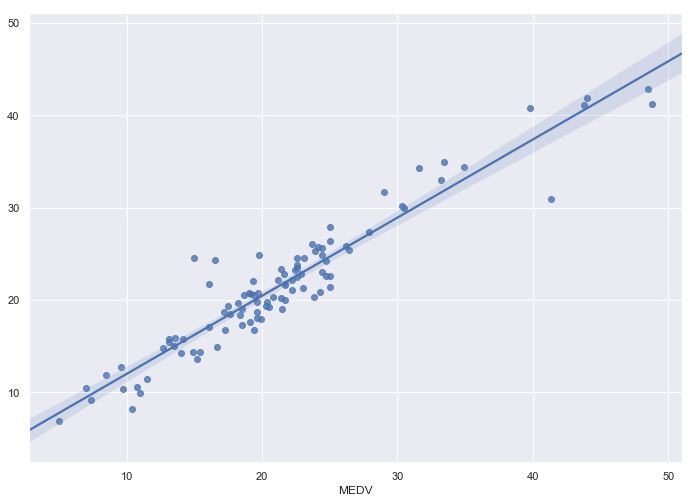

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Train the model by GradientBoostingRegressor
linear_model = GradientBoostingRegressor()
linear_model.fit(X_train, Y_train)

# Model evaluation for training set
y_train_predict = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('Root_Mean_Squared_Error is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Model evaluation for testing set
y_test_predict = linear_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('Root_Mean_Squared_Error is {}'.format(rmse))
print('R2 score is {}'.format(r2))

# Train model using X_train and Y_train, and make predictions on X_test
model = linear_model
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
print('\nScatter plot of y_test against y_pred:')
sns.regplot(Y_test, y_pred)